In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.spatial import distance
from scipy.cluster import hierarchy

%matplotlib inline
os.chdir('/panicle/ssapkot/git_repo/StarchProtein/')

### PairGrid Data correlation and distribution

In [3]:
df= pd.read_csv('/panicle/ssapkot/GrainComp/data/SAP_GrainComp_herit-pheno.csv')
df2= pd.read_csv('/panicle/ssapkot/GrainComp/data/pheno.csv')
print(df.head())
df2 = df2.iloc[:,[0,6,7]]
df = df.iloc[:,[0,1,12,13]]
# df.rename(columns={'Sta':'Starch'}, inplace=True)
# df.rename(columns={'Prt':'Protein'}, inplace=True)
df[['Year']] = df[['Year']].astype(str)
print(df.dtypes)
print(df.head())

       Taxa  Year  Rep  r1  r2  r3  r4  r5  r6  Amylose   Fat   Cal.g  Starch  \
0  PI152651  2013    1   1   0   0   0   0   0     13.0  2.44  4033.0    73.9   
1   PI17548  2013    1   1   0   0   0   0   0     17.9  3.85  4172.0    66.7   
2   PI24969  2013    1   1   0   0   0   0   0     14.4  2.37  4049.0    72.2   
3  PI329435  2013    1   1   0   0   0   0   0     14.2  2.08  4102.0    66.8   
4  PI329440  2013    1   1   0   0   0   0   0     15.7  2.51  4084.0    70.1   

   Protein  
0     9.03  
1    10.71  
2    11.05  
3    14.56  
4    10.70  
Taxa        object
Year        object
Starch     float64
Protein    float64
dtype: object
       Taxa  Year  Starch  Protein
0  PI152651  2013    73.9     9.03
1   PI17548  2013    66.7    10.71
2   PI24969  2013    72.2    11.05
3  PI329435  2013    66.8    14.56
4  PI329440  2013    70.1    10.70


/software/anaconda/5.1.0/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/software/anaconda/5.1.0/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


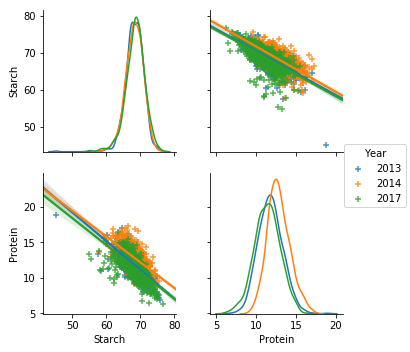

In [7]:
g = sns.pairplot(data=df, diag_kind="kde", markers="+", kind= "reg", hue='Year', vars=['Starch','Protein'])

/software/anaconda/5.1.0/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


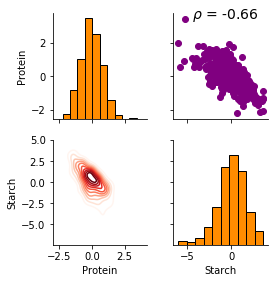

In [3]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 14, xycoords = ax.transAxes)

# Create an instance of the PairGrid class.
g = sns.PairGrid(data= df2, size = 2)
# Map a scatter plot to the upper triangle
g.map_upper(plt.scatter, color = 'purple')
g.map_upper(corr)
# Map a histogram to the diagonal
g.map_diag(plt.hist, color = 'darkorange', edgecolor = 'k')
# Map a density plot to the lower triangle
g.map_lower(sns.kdeplot, cmap = 'Reds')

plt.savefig("results/BLUPs_dist-corr.png",  dpi=500)

## Significant SNPs

                        leaf  early_infl  emer_infl  seed_5DAP  seed_10DAP  \
SORBI_3004G260700   5.491853    2.584963   2.000000   1.584963    0.000000   
SORBI_3004G260800  10.801708    8.968667   8.299208   8.527477    8.209453   
SORBI_3008G111500   3.321928    4.087463   3.906891   3.321928    5.087463   
SORBI_3008G111600   3.459432    6.044394   6.614710   6.357552    4.392317   

                     anther    pistil     embryo  endosperm  
SORBI_3004G260700  2.000000  2.807355   3.807355   1.000000  
SORBI_3004G260800  9.116344  8.845490  11.193525   8.082149  
SORBI_3008G111500  0.000000  3.700440   5.882643   6.781360  
SORBI_3008G111600  6.189825  6.285402   7.076816   3.700440  


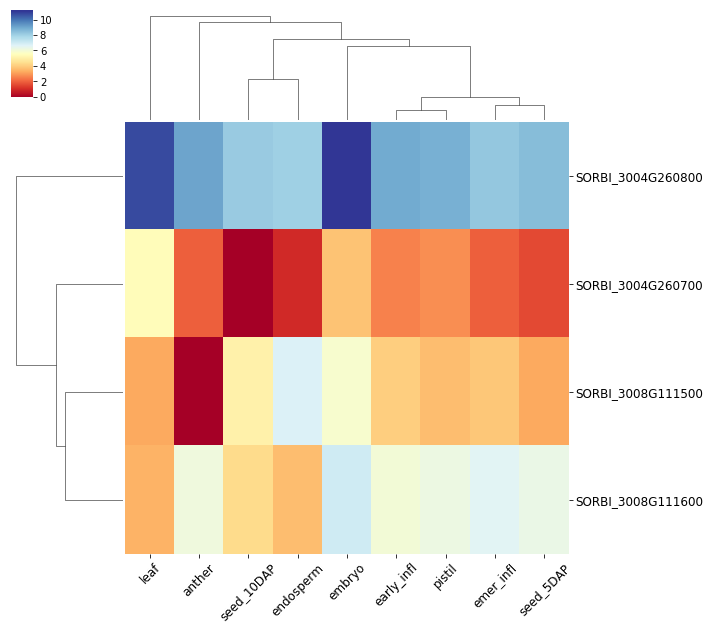

In [7]:
df = pd.read_csv('results/expression/Davidson_Original_Genes.csv',index_col=0)
print(df.head())
g = sns.clustermap(df,cmap='RdYlBu')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 12, rotation=45)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 12, rotation=0)
plt.savefig('results/expression/Heatmap_Org_Genes-Davidson.png', bbox_inches='tight', dpi=500)

### Genes and Interactors

                   floral.meristem    flower  plant.embryo      root  \
SORBI_3002G175400         5.906891  5.857981      5.247928  4.807355   
SORBI_3004G260600        -2.321928 -1.000000     -0.152003  1.584963   
SORBI_3004G260800         7.607330  9.177420      9.473706  8.303781   
SORBI_3004G312500         2.807355 -3.321928      2.807355  8.011227   
SORBI_3006G111700         5.807355  5.285402      5.672425  4.523562   

                      shoot  vegetative.meristem group KEGG_Path  
SORBI_3002G175400  6.228819             5.906891  Chr4       NaN  
SORBI_3004G260600  0.000000            -3.321928  Chr4       NaN  
SORBI_3004G260800  9.505812             7.546894  Chr4        GH  
SORBI_3004G312500  2.321928             2.321928  Chr4         I  
SORBI_3006G111700  4.459432             6.108524  Chr4       NaN  


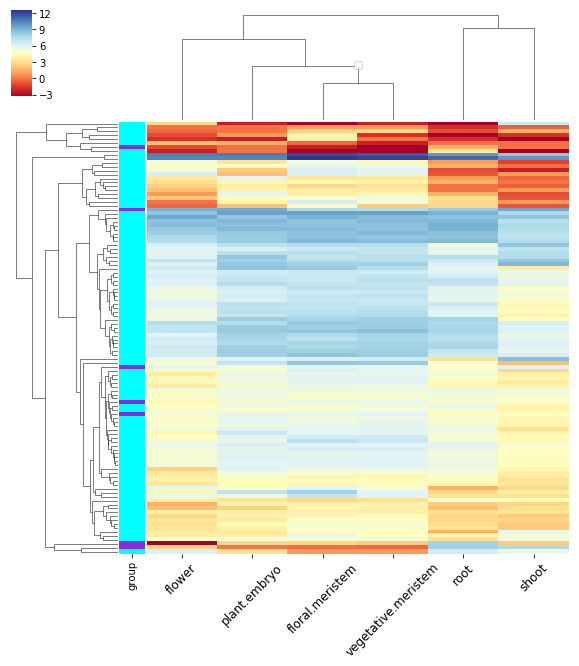

In [3]:
df = pd.read_csv('results/expression/Olson_GeneExp_GenesInteractors_Annot.csv',index_col=0)
#print(df.head())
#sns.set(font_scale=1)
#correlations_array = np.asarray(df)
# iris = sns.load_dataset("iris")
# print(iris.head())

print(df.head())
group = df.pop("group")
kegg = df.pop("KEGG_Path")

lut1 = dict(zip(group.unique(), ['blueviolet','cyan']))
row_colors1 = group.map(lut1)

#pal = sns.palplot(sns.color_palette("muted"))

lut2 = dict(zip(kegg.unique(),sns.color_palette("colorblind")))
row_colors2 = kegg.map(lut2)

row_colors = pd.concat([row_colors1,row_colors2],axis=1)
log = df.iloc[:,0:8]
#g = sns.clustermap(log, yticklabels=False, col_cluster=True,cmap="RdYlBu")

#g = sns.clustermap(df, row_linkage=row_linkage, col_linkage=col_linkage,  method="average", cmap='RdYlBu')
g = sns.clustermap(df, row_colors=row_colors1, col_cluster=True, yticklabels=False, cmap='RdYlBu')

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 12, rotation=45)

g.ax_col_dendrogram.legend(loc="center", ncol=5)
#g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 4.5)
#plt.tick_params(axis='both', which='minor', labelsize=6)
# # plt.xticks(fontsize=14, rotation=60)
# # plt.yticks(fontsize=8)
plt.savefig('results/expression/Heatmap_GeneInteractors_Expression-Olson_2.png', bbox_inches='tight', dpi=500)

In [88]:
# sns.set(font="Arial")

# # Load the brain networks example dataset
# df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
# #df = pd.read_csv('results/expression/Davidson_Exp_GeneInt_Annot.csv',index_col=0)
# print(df.head())
# # Select a subset of the networks
# used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
# used_columns = (df.columns.get_level_values("network")
#                           .astype(int)
#                           .isin(used_networks))
# df = df.loc[:, used_columns]
# # Create a custom palette to identify the networks
# network_pal = sns.cubehelix_palette(len(used_networks),
#                                     light=.9, dark=.1, reverse=True,
#                                     start=1, rot=-2)
# network_lut = dict(zip(map(str, used_networks), network_pal))

# # Convert the palette to vectors that will be drawn on the side of the matrix
# network_labels = df.columns.get_level_values("network")
# network_colors = pd.Series(network_labels, index=df.columns).map(network_lut)

# # Create a custom colormap for the heatmap values
# cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# # Draw the full plot
# g = sns.clustermap(df.corr(),

#                   # Turn off the clustering
#                   row_cluster=False, col_cluster=False,

#                   # Add colored class labels
#                   row_colors=network_colors, col_colors=network_colors,

#                   # Make the plot look better when many rows/cols
#                   linewidths=0, xticklabels=False, yticklabels=False)

# # Draw the legend bar for the classes                 
# for label in network_labels.unique():
#     g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
#                             label=label, linewidth=0)
# g.ax_col_dendrogram.legend(loc="center", ncol=5)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

### KEGG pathway enriched genes

In [22]:
df = pd.read_csv('results/annotation/Genes_interactors/pub/Gene_Int_KEGG_Pathway_Enriched.csv')
print(df.head())

          SbID           SobicID             GeneID  Protein_Pro  RNA_Deg  \
0  Sb01g005860  Sobic.001G064500  SORBI_3001G064500            1        0   
1  Sb01g011310  Sobic.001G129000  SORBI_3001G129000            1        0   
2  Sb01g017050  Sobic.001G193500  SORBI_3001G193500            0        1   
3  Sb01g020010  Sobic.001G228200  SORBI_3001G228200            0        1   
4  Sb01g039390  Sobic.001G418600  SORBI_3001G418600            1        0   

   Endocytosis  Plant-Path-Int  Spliceosome  
0            0               0            0  
1            1               0            1  
2            0               0            0  
3            0               0            0  
4            1               0            1  


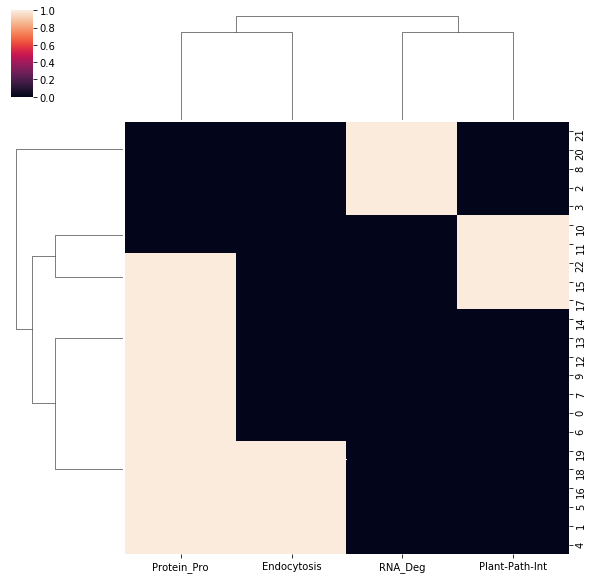

In [24]:
g = sns.clustermap(df.iloc[:,3:7])